In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |  

In [3]:
df=pd.read_csv('MBTI 500.csv')
df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [4]:
# ตรวจดูรูปร่างของข้อมูล
df.shape

(106067, 2)

In [5]:
# ตรวจดูความสมบูรณ์ของข้อมูล
df.isnull().sum()

posts    0
type     0
dtype: int64

In [6]:
df['type'].value_counts()

type
INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

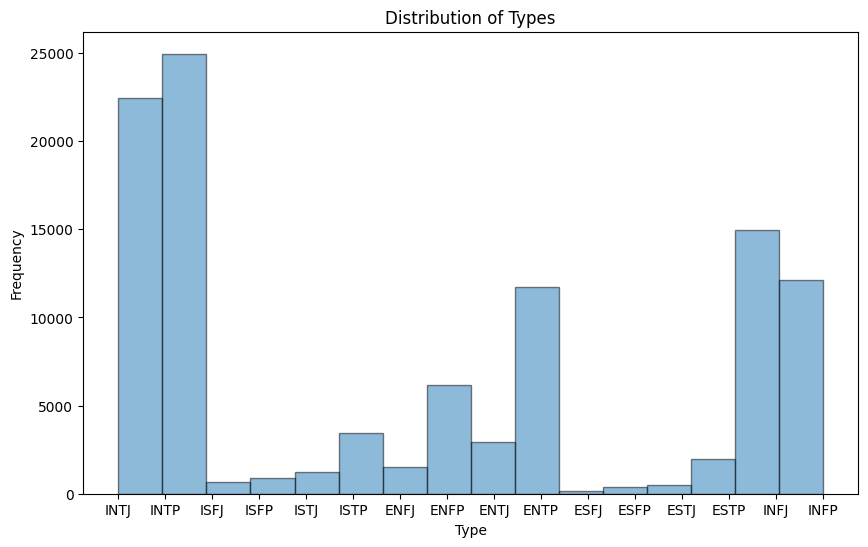

In [8]:
# ดูการกระจายของข้อมูลในแต่ละคลาส
plt.figure(figsize=(10, 6))
plt.hist(df['type'], bins=len(df['type'].unique()), alpha=0.5, edgecolor="black")
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Distribution of Types')
plt.show()

In [9]:
# เรียกดูข้อมูลแถวแรกในคอลลัม posts 
df['posts'][0]

'know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sw

In [10]:
#remove URL
df['posts'] = df['posts'].apply(lambda x: re.sub(r'http\S+', '', x))
#remove URL
df['posts'] = df['posts'].str.replace(r'\|\|\|', '')

# Expand the list of messages into separate rows
df = df.explode('posts')

# Reset ตำแหน่ง
df.reset_index(drop=True, inplace=True)

# เรียกดูข้อมูลที่ได้
print(df['posts'][0])

know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low swe

In [11]:
# ฟังก์ชั้นการทำ preprocess
def preprocess_text(text):
    # เปลี่ยนทุกตัวให้เป็นตัวอักษรตัวพิมพ์เล็ก
    text = text.lower()
    #remove tagged name
    text = re.sub(r'@\w+\s*', '', text)
    # นำตัวเลขออก
    text = re.sub(r'\d+', '', text)
    # นำตัวอักษรลดรูปออก
    text = re.sub(r'\b(\w+)(\'s|\'ve|\'d)\b', r'\1', text)
    # นำอักขระพิเศษออก
    text = re.sub(r'[_;:()]', '', text)
    #remove puncutation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove ~
    text = re.sub(r'~', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # ลดรูปคำที่มีความหมายเหมือนกันให้อยู่ในรูปเดียวกัน
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # นำ stopwords ออก
    words = [word for word in lemmatized_words if word not in stop_words and word != '...']
    #นำคำที่เหลืออยู่มาต่อรวมกัน
    processed_text = ' '.join(words)
    return processed_text

In [12]:
df['posts'] = df['posts'].apply(preprocess_text)

In [13]:
df['posts'][0]

'know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sw

In [23]:
df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [15]:
X = df['posts']
y = df['type']
len(X)

106067

In [16]:
from sklearn.model_selection import train_test_split, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [18]:
# # before hyperparameter tuning [train เร็วกว่า]
# pipeLSVC = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('clf', LinearSVC(dual="auto"))
# ])

# after hyperparameter tuning [train ช้าหน่อย]
pipeLSVC = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 2))),
    ('clf', LinearSVC(C=10, dual="auto"))
])

In [19]:
pipeLSVC.fit(X_train, y_train)
predictLSVC = pipeLSVC.predict(X_test)
print(f"LSVC: {accuracy_score(y_test, predictLSVC):.2f}")

LSVC: 0.85


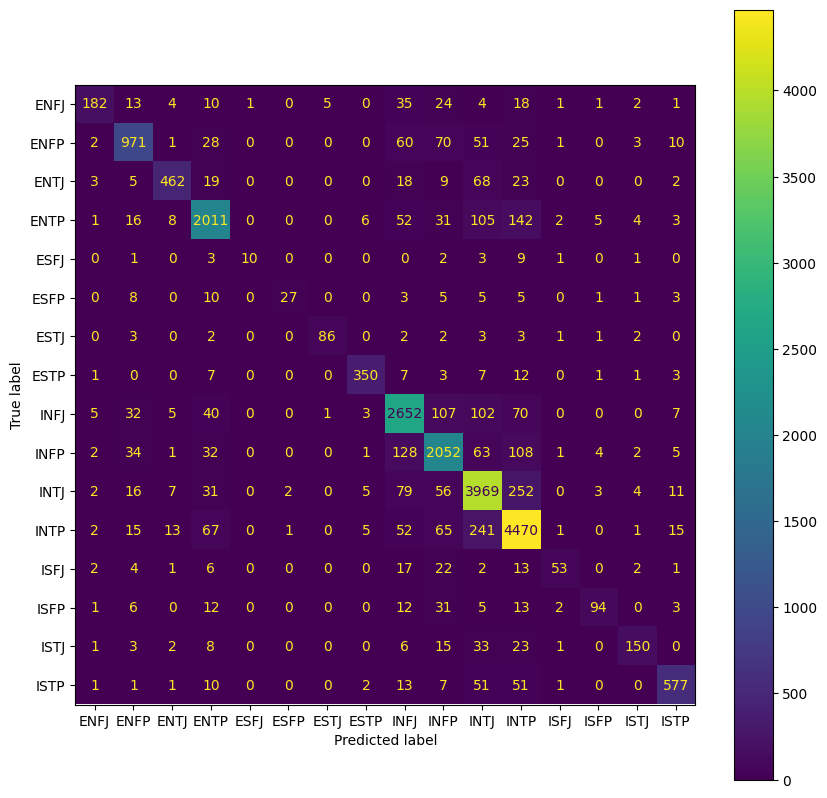

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, predictLSVC, labels=pipeLSVC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipeLSVC.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

**Grid Search Cross-validation V.1**

In [ ]:
# Assuming 'mbti_type' is the column containing MBTI types and 'data' is your DataFrame
# Group data by MBTI type
grouped_data = df.groupby('type')

# Define the number of samples to randomly select from each group
num_samples_per_group = 181  # Adjust as needed

# Initialize an empty list to store sampled subsets
sampled_data = []

# Perform random sampling for each group
for mbti_type, group_df in grouped_data:
    # Perform random sampling from the current group
    sampled_subset = group_df.sample(min(num_samples_per_group, len(group_df)), random_state=42)
    # Append the sampled subset to the list
    sampled_data.append(sampled_subset)

# Combine sampled subsets into a single DataFrame
sampled_df = pd.concat(sampled_data)

# Reset index of the final sampled DataFrame
sampled_df.reset_index(drop=True, inplace=True)

# Now 'sampled_df' contains the randomly sampled data from each MBTI type

In [ ]:
# Define the parameter grid
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],  # Range of n-grams
    'tfidf__max_df': [0.8, 0.9, 1.0],  # Maximum document frequency
    'tfidf__min_df': [1, 2, 3],  # Minimum document frequency
    'clf__C': [0.1, 1, 10]  # Regularization parameter for LinearSVC
}

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeLSVC, param_grid, cv=5, n_jobs=1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print("Best parameters:", best_params)
print("Best score:", best_score)

**Grid Search Cross-validation V.2**

In [ ]:
# # Gridsearch to determine the value of C
# param_grid = {'clf__C':np.arange(0.01,100,10)}
# linearSVC = GridSearchCV(pipeLSVC,param_grid,cv=5,return_train_score=True)
# linearSVC.fit(X_train,y_train)
# print(linearSVC.best_params_)
# #linearSVC.coef_
# #linearSVC.intercept_

# bestlinearSVC = linearSVC.best_estimator_
# bestlinearSVC.fit(X_train,y_train)
# bestlinearSVC.coef_ = bestlinearSVC.named_steps['clf'].coef_
# bestlinearSVC.score(X_train,y_train)

**Train Result**

In [21]:
print(classification_report(y_test, predictLSVC))

              precision    recall  f1-score   support

        ENFJ       0.89      0.60      0.72       301
        ENFP       0.86      0.79      0.83      1222
        ENTJ       0.91      0.76      0.83       609
        ENTP       0.88      0.84      0.86      2386
        ESFJ       0.91      0.33      0.49        30
        ESFP       0.90      0.40      0.55        68
        ESTJ       0.93      0.82      0.87       105
        ESTP       0.94      0.89      0.92       392
        INFJ       0.85      0.88      0.86      3024
        INFP       0.82      0.84      0.83      2433
        INTJ       0.84      0.89      0.87      4437
        INTP       0.85      0.90      0.88      4948
        ISFJ       0.82      0.43      0.56       123
        ISFP       0.85      0.53      0.65       179
        ISTJ       0.87      0.62      0.72       242
        ISTP       0.90      0.81      0.85       715

    accuracy                           0.85     21214
   macro avg       0.88   

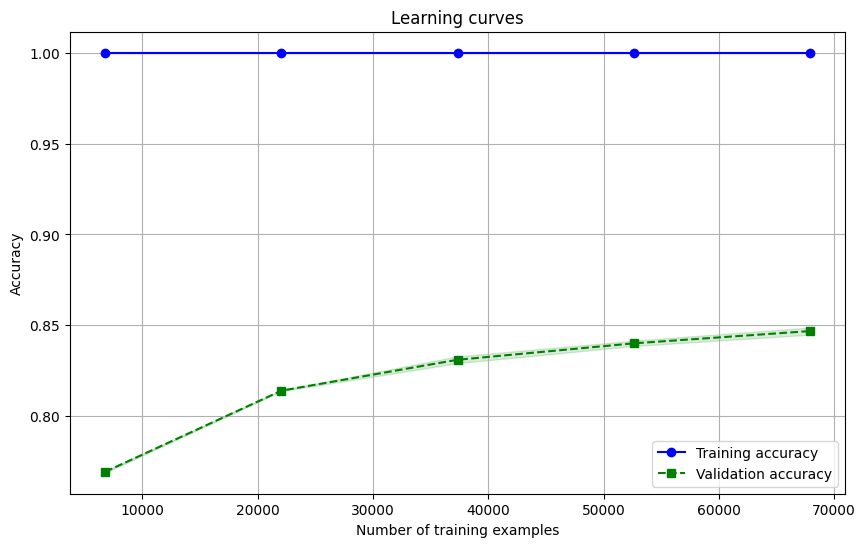

In [22]:
# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(pipeLSVC, X_train, y_train, cv=5, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning curves')
plt.legend()
plt.grid(True)
plt.show()

**Predict-1 (Input text)**

In [ ]:
msg = """ I dont think anyone would be able to live 300 years i am not talking about the physical ability to do so but the mental fortitude unless you decide to live away from civilization it simply is not possible.|||Believe me you would not want to live for that long alone , unless there are others who can live for 300 years as well.|||You cannot enjoy something if you say something to yourself like ‘I wanna enjoy this , i think this thing is gonna be fun’ believe me it doesn’t work.|||I think this problem might be face by a lot of people.|||Firstly you should only study stuff that interests you . (obvious)|||Now there are subjects that you school forces you to take and you have no option but to some how score in those subjects. (What i used to think is subjects like history , geography and most of all Hindi are utterly useless , i wanna be a programmer why do i study these)|||But because i had no choice i thought lets give these a try. I started questioning things and when i dug deep into the events of history and and why each event took place or how it was of benefit to the benefactor. This questioning and finding out the reasons made me like history.|||My point is unless ya’ll start questioning and researching further than whats necessary for exams you wont like that subject. All the subjects are beautiful , its what you choose to see. Basically give everything a real shot in life , everything works out. (my advice seems ironical as if you dont like the subject and i am telling you to research further but try it once )|||And also never study because there is exam or because you have to do an assignment or because someone is told you to or because ….|||But please ONLY STUDY BECAUSE YOU FEEL LIKE AND BECAUSE YOU WANT TO. Until you develop this sense of want to study it will be hard for you to like it. You must like it so much , that you know when people say after studying maths for 1 hour they took a break of 20 mins watching their favorite tv show(lets say friends)|||For you it should be like after 1 hour of x(that you dont like but HAVE to do) activity you take a break of 20 mins and you study , (like i like reading article on ai so i do that) you might like bio you will do that what i want to say is that is what it means to like something and only then you can truly enjoy it.|||If only something known as luck existed. (no offence to the readers or person who asked the question)|||Luck is a really interesting term , a really complex illusion. What i am saying is there is nothing known as luck that exists. Something simply doesnt just happen. It happens for a reason and with a reason.|||Some over here might claim that if it is not luck then what is it that cause (cause a child to be born in a rich family or a person to be saved by weirdest phenomenon and escape death.)|||What i want ya’ll to know is firstly that being born rich cannot be called as “lucky” like we cannot say to be born in a rich family is particularly a good thing there are many reasons to this (some people like to work their way up , Some want to experience the life troubles, well whatever the reasons might be) So firstly when we say something to be lucky we just CONSIDER that what happened was good. Same goes with the case of being saved from and awful accident. We still dont know the purpose of life or our existence and hence we dont know if living is a boon. this might be harsh for some but Reality is Harsh.|||What want ya’ll to know is never feel bad if something good(in your perspective) happens to someone as It might as well not turn out to be good if you see the BIG picture.|||Besides its also a good thing to think this way as its boosts up your hopes , like you might consider that everything that has happened to you has made you what you are and even if you don’t appreciate your conditions there is someone somewhere who would want to be in that.|||I think the all of us are 100% selfish. (no offence)|||The thing is even if we say we care about someone and then we help that person in reality we are just making ourselves happy by helping that someone.|||What i mean to say is even when people talk about sacrifices for others the reality is that sacrifice made that person or those persons happy which you cared for and thus those people being happy makes you happy.|||Everything comes down to you. You can try and deny it but you all know it.|||Now about those people who sacrifice their lives for others that is a peculiar case , and here too (this might be hard for some to believe) but they sacrifice life for someone they loved (they thought they loved) but the truth is in a situation where a person sacrifices his life for another the truth is that if he hadnt dont that he couldn’t have survived without that person anyways and then there are always some who seek glory.|||I hope you get the point. Even when you say that people spend 30s and 40s the truth is making their kids life perfect gives them happiness. There are people without kids too cause for these making their kids life perfect doesnt give them as much happiness as focusing on their own goals might.|||Now i believe there might be many who thought that making kids life perfect might give them happiness but it turns out to be false and then they are stuck there fulfilling moral obligations. It all comes down to your resolves and how firm you are in you decisions.|||Isn’t it fun to watch our disciples fight among themselves to prove that only one of us exists!|||I tend to believe that everything in this universe HAS TO HAVE A PURPOSE. Rather than thinking that the universe is a useless place and we have no purpose i would rather think we are just too stupid and dont know or cannot find the purpose. I have always wondered that what would be our reason to exist , once i thought of us (humans on earth) a crop created by aliens that takes this long to grow (i mean may be it would be not possible to create humans by a process other than evolution) so the aliens started the life on earth and are now just waiting for us to evolve , and so our purpose according to that is nothing but to serve as food or may be what ever they want , now then the question arises is what would their purpose be , And all such hypothetical situation lead to to scenario to go into infinity.|||After a lot of such crazy thought i came to 2 conclusions , 1 is pretty simple our purpose of life is find a purpose for our lives , and the weird thing is unlike other things once you find what your were looking for , the process ends there. The paradox is after you find your purpose of life did your succeed in finishing your purpose of life or did you just begun ?|||The 2nd one is what most people should agree is happiness. Now I think that this happiness should be confined to YOUR’s and ONLY your Happiness. Now the thing is some people gain happiness by giving people happiness.|||Let happiness be a quantifiable entity. We shall say that we start 0 oh hp . |||The zone where we dont feel happy or sad is 0 . Anything above 0 means you are happy and less than 0 is you are sad .|||Now one might think that if we suppose attain 100 hp , and do nothing after that we shall remain happy , the problem is that after a while our bar above which we remain moves up (simple adaptation) so now anything below 100hp is sad . This is the main problem with happiness , and So we need to keep doing stuff and increasing our hp . So maybe this counts as a purpose of life.|||Like when we are told about those saints and stuff who abandon society and live their life alone in discrete places where no one can disturb them. I believe the simple reason for this they have found happiness in doing nothing . Like someone finds happiness in making more money (there is a possibility that you might not make and hence be sad ) So these saint type people do something that has no opposite , like i know when they do nothing (i know its opposite is everything) and thats the very reason they go away from the civilization where they literally will have to do nothing . I also tend to think of these people as cowards who fear that they might loose at point.|||But the very point arises is what did you gain by gaining happiness. So again there is no end so Keep chasing the infinity its pointless but Keeps you busy(till the point you are alive) then after you are dead i guess nothing matters.|||But anyways thats the most easy thing to obtain happiness without sadness.|||But the very point arises is what did you gain by gaining happiness. So again there is no end so Keep chasing the infinity its pointless but Keeps you busy(till the point you are alive) then after you are dead i guess nothing matters.|||But if the life after death theory is true , and if by chance are memories are also transferred every time we are reborn. We all are fucked We are for infinity stuck chasing the infinity . (I wonder what happens when infinity chases infinity It will be fun to watch !) |||I think rather than worrying about these things we should just enjoy life . Because there will always something that we dont know that we dont know and thus we shall never know that. this is just 2 loops of not know , you can reach it , but Do it infinitely . Infinity is a bitch.|||Well To all beings good luck finding a purpose and to all those who know that it doesnt exist ya’ll are fucked."""
clsf = pipeLSVC.predict([msg])
print(clsf)

**Predict-2 (Input file)**

In [24]:
test_data=pd.read_csv('mbti_testing.csv')
test_data.head()

,type,posts
0,ESFP,how do people ENJOY cardio PLEASE WHAT IS THE ...
1,ENFP,SOLAR ECLIPSE INCOMING!!! For my fellow murica...
2,ENTJ,"Hello there, I'm a female INFP and I have a ma..."
3,INTP,oh! oh! i got to try the shark juice!!! it is...
4,ENFJ,We play in an opinion-based sport not a factu...


In [25]:
nltk.download('stopwords')
nltk.download('book')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[

True

In [26]:
# ใช้คลังคำ stop words ที่เป็นภาษาอังกฤษ
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [27]:
# ฟังก์ชั้นการทำ preprocess
def preprocess_text(text):
    # เปลี่ยนทุกตัวให้เป็นตัวอักษรตัวพิมพ์เล็ก
    text = text.lower()
    #remove tagged name
    text = re.sub(r'@\w+\s*', '', text)
    # นำตัวเลขออก
    text = re.sub(r'\d+', '', text)
    # นำตัวอักษรลดรูปออก
    text = re.sub(r'\b(\w+)(\'s|\'ve|\'d)\b', r'\1', text)
    # นำอักขระพิเศษออก
    text = re.sub(r'[_;:()]', '', text)
    #remove puncutation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # ลดรูปคำที่มีความหมายเหมือนกันให้อยู่ในรูปเดียวกัน
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # นำ stopwords ออก
    words = [word for word in lemmatized_words if word not in stop_words and word != '...']
    #นำคำที่เหลืออยู่มาต่อรวมกัน
    processed_text = ' '.join(words)
    return processed_text

In [28]:
# ปรับใช้ฟังก์ชัน preprocess_text กับคอลลัม 'posts'
test_data['posts'] = test_data['posts'].apply(preprocess_text)

In [29]:
test_data['type']

0    ESFP
1    ENFP
2    ENTJ
3    INTP
4    ENFJ
5    ESFJ
Name: type, dtype: object

In [30]:
test_data.head()

,type,posts
0,ESFP,people enjoy cardio please secret loving hate ...
1,ENFP,solar eclipse incoming fellow muricans first o...
2,ENTJ,hello im female infp male entj friend ill try ...
3,INTP,oh oh got try shark juice seriously good alway...
4,ENFJ,play opinionbased sport factualbased sport sai...


In [31]:
# Extract text data from test_data
X_test_text = test_data['posts'].tolist()
y_test_text = test_data['type'].tolist()

In [32]:
# Predict using the previously trained SVC pipeline
predicted_type_test = pipeLSVC.predict(X_test_text)
print("predict: ", predicted_type_test)
print("real answer: ", y_test_text)

predict:  ['INTP' 'INTJ' 'INFP' 'ENTP' 'INFP' 'ENTP']
real answer:  ['ESFP', 'ENFP', 'ENTJ', 'INTP', 'ENFJ', 'ESFJ']


In [33]:
def calculate_accuracy_split_individual(predicted_type, real_type):
    accuracies = []
    
    # Iterate over each pair of predicted type and real answer
    for predicted_type, real_type in zip(predicted_type, real_type):
        # Split each predicted type and real answer into individual characters
        predicted_chars = [char for char in predicted_type]
        real_chars = [char for char in real_type]
        
        # Count the number of correct letters
        correct_letters = sum(1 for p, r in zip(predicted_chars, real_chars) if p == r)
        total_letters = len(real_chars)
        
        # Calculate accuracy for this prediction
        accuracy = correct_letters / total_letters
        accuracies.append(accuracy)
    
    return accuracies
accuracies_split_individual = calculate_accuracy_split_individual(predicted_type_test, y_test_text)

In [37]:
# # Calculate accuracy
accuracy = accuracy_score(y_test_text, predicted_type_test)
print("Accuracy:", accuracy)
print("Accuracies based on correct letters (split) for each prediction:", accuracies_split_individual)
print("Mean accuracies based on correct letters (split) for each prediction:", sum(accuracies_split_individual)/len(X_test_text))

Accuracy: 0.0
Accuracies based on correct letters (split) for each prediction: [0.25, 0.25, 0.25, 0.75, 0.5, 0.25]
Mean accuracies based on correct letters (split) for each prediction: 0.375


**Save trained model**

In [38]:
import joblib

In [39]:
filename = 'LSVC-tuned.sav'
joblib.dump(pipeLSVC, filename)

['LSVC-tuned.sav']

**Load trained model**

In [40]:
loaded_model = joblib.load(filename)

In [41]:
y_predict = loaded_model.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        ENFJ       0.89      0.60      0.72       301
        ENFP       0.86      0.79      0.83      1222
        ENTJ       0.91      0.76      0.83       609
        ENTP       0.88      0.84      0.86      2386
        ESFJ       0.91      0.33      0.49        30
        ESFP       0.90      0.40      0.55        68
        ESTJ       0.93      0.82      0.87       105
        ESTP       0.94      0.89      0.92       392
        INFJ       0.85      0.88      0.86      3024
        INFP       0.82      0.84      0.83      2433
        INTJ       0.84      0.89      0.87      4437
        INTP       0.85      0.90      0.88      4948
        ISFJ       0.82      0.43      0.56       123
        ISFP       0.85      0.53      0.65       179
        ISTJ       0.87      0.62      0.72       242
        ISTP       0.90      0.81      0.85       715

    accuracy                           0.85     21214
   macro avg       0.88   